When you think of diffusion models, text-to-image is usually one of the first things that come to mind. Text-to-image generates an image from a text description(for example,"Astronaut in a jungle, cold color palette, mutes colors, detailed, 8k") whih is also known as a prompt.

From a very high level, a diffusion model takes a prompt and some random initial noise, and iterativelt removes the noise to construct an image. The denoising process is guided by the prompt, and once the denoising process ends after a predetermind number of time steps, the image representaion is decoded into an image.

We can generate images from a prompt in two steps:

1. | Load a checkpoint into the AutoPipelineForText2Image class, which automatically detects the appropriate pipeline class to use based on the checkpoint:

In [1]:
!pip install diffusers==0.23.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.4 MB/s eta 0:00:00


In [2]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16").to("cuda")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

2024-01-31 06:31:27.104227: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-31 06:31:27.104352: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-31 06:31:27.234457: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

2. |Pass a prompt to the pipeline to generate an image:

  0%|          | 0/50 [00:00<?, ?it/s]

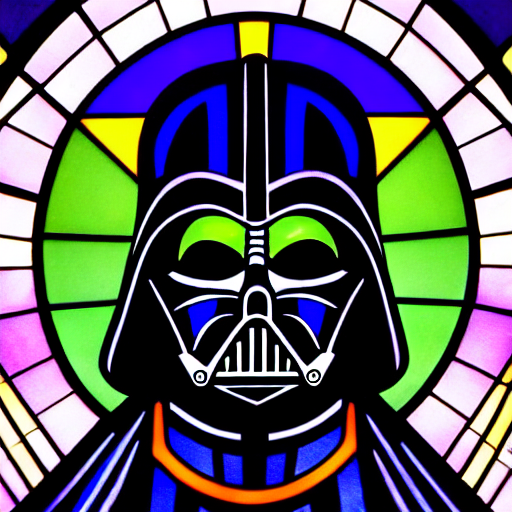

In [3]:
image = pipeline(
    "stained glass of darth vader, blacklight, centered composition, masterpiece, photorealistic, 8k").images[0]
image

# Popular models

The most common text-to-image models are Stable Diffusion V1.5, Stable Diffusion XL(SDXL), and Kandinsky2.2. There are also ControlNet models or adapters that can be udes with text-to-image models for more direct control in generating images. The results from each model are slightly different because of their architecture and training process, but no matter which model you chose, their usage is more or less the same. Let's use the same prompt for each model and compare their results.